## Project 1
Prepared by Matthew Young for CSCI 2022

### Question 1

<b>(a)</b> The file data4.txt contains 4 data sets, with well separated means, that are mixed (randomly) into a single file. Your task is to separate the 4 data sets and report their means and std.deviations. For the separation, use the procedure below. This is an example of Machine Learning. The machine learns the characteristics of the data sets as below

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython import display

In [2]:
# read in data from data4.txt
data = infile = open('data4.txt', 'r')

# initiate the list for x & y coordinates
# they will be stored as [[x,y],[x,y],...,[x,y]]
points = []

# loop through the file, split the lines into x & y coordinates
for line in data:
    coord = line.split(',')
    points.append([float(coord[0]), float(coord[1])])

# close the file
data.close()

<b>(b)</b> Pick any four data points to use as initial seeds for the four groups

In [3]:
# instantiate the centres
centre_1 = []
centre_2 = []
centre_3 = []
centre_4 = []

<b>(c)</b> The first four points can serve as initial centres for the k = 4 groups. (You are free to select any 4 data points as the initial points.)

In [4]:
# shuffle the points to get random initial centre points
np.random.default_rng().shuffle(points)

# assign the different centre points
centre_1 = points[0]
centre_2 = points[1]
centre_3 = points[2]
centre_4 = points[3]

<b>(d)</b> For each data point, compute the distance to each of the four centres.

In [5]:
# initialize the list of distances from centre points
centre_1_dist = []
centre_2_dist = []
centre_3_dist = []
centre_4_dist = []

# make lists of the distance lists and the centre points
dists = [centre_1_dist, centre_2_dist, centre_3_dist, centre_4_dist]
centres = [centre_1, centre_2, centre_3, centre_4]

# calculate all the distances
# for every point, measure the distance from all 4 centre points
for i in range(len(points)):
    for j in range(len(dists)):
        # the formula for determining distance is (point(x) - centre(x))^2 + (point(y) - centre(y))^2
        # these distances get added to the centre distance list corresponding to the centre we are measuring the distance from
        dists[j].append((points[i][0] - centres[j][0]) ** 2 + (points[i][1] - centres[j][1]) ** 2)

<b>(e)</b> Assign the data point to the group with the closest centre. (Hint: For efficiency, use the squares of the distances. This will also help with part (f ) below).

In [6]:
# initialize the different groups
group_1 = []
group_2 = []
group_3 = []
group_4 = []

# initialize the group of groups
groups = [group_1, group_2, group_3, group_4]

# assign the points to the different groups based on the shortest distance
for i in range(len(points)):
    # find the minimum of each distance list
    minimum = min(centre_1_dist[i], centre_2_dist[i], centre_3_dist[i], centre_4_dist[i])
    # find the index of the minimum, this index corresponds to the closest centre
    index = [centre_1_dist[i], centre_2_dist[i], centre_3_dist[i], centre_4_dist[i]].index(minimum)
    # use the index to add the point to the group corresponding to the closest centre
    groups[index].append(points[i])

<b>(f)</b> Compute the new centroids (centres) of the four new groups generated

In [7]:
# create a new copy of the centres
old_centres = centres.copy()

# find the average value of the x and y values of every point in each group
for i in range(len(groups)):
    x_sum = 0
    y_sum = 0
    for j in range(len(groups[i])):
        x_sum += groups[i][j][0]
        y_sum += groups[i][j][1]
    # these averages of each group become the new corresponding centre point
    centres[i] = [x_sum / len(groups[i]), y_sum / len(groups[i])]

In [8]:
# calculate the distance between the old centre and the new centre and take the average
# once this value gets low enough we'll stop the program
sum_dist = 0
for i in range(len(centres)):
    sum_dist += (old_centres[i][0] - centres[i][0]) ** 2 + (old_centres[i][1] - centres[i][1]) ** 2
avg_dist = sum_dist / len(centres)

<b>(g)</b> Repeat steps (a), (b), until the centroids do not change between iterations. Use a tolerance of 1.e − 4 for this data set

In [9]:
# I've turned all the processes above into functions for easier iteration

def get_dists(points, centres):
    '''
    Calculates the distance between each data point and each centre
    
    --Inputs--
    points: n by 2 list of the data points, each list item contains a list with the point's x and y values
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    
    --Output--
    dists: 4 by n list of distances, there is one distance for each point for each centre, organized by centre.
    '''
    
    # instantiate the list of lists for the distances
    dists = [[],[],[],[]]
    
    # as above, calculate all the distances
    # for every point, measure the distance from all 4 centre points
    for i in range(len(points)):
        
        for j in range(len(dists)):
            # the formula for determining distance is (point(x) - centre(x))^2 + (point(y) - centre(y))^2
            # these distances get added to the centre distance list corresponding to the centre we are measuring the distance from
            dists[j].append((points[i][0] - centres[j][0]) ** 2 + (points[i][1] - centres[j][1]) ** 2)
    
    return dists

def get_groups(points, dists, centres, RSSs):
    '''
    Assigns each data point to the group closest centre also calculates the residual sums of squares
    
    --Inputs--
    points: n by 2 list of the data points, each list item contains a list with the point's x and y values
    dists: 4 by n list of distances, there is one distance for each point for each centre, organized by centre
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    RSSs: 4 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done
    
    --Output--
    groups: 4 by m by 2 list of groups, there are 4 groups containing m points (likely different for each group)
           each point list contains the point's x and y values
    RSSs: 4 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done 
    '''
    # instantiate the list of 4 lists for the groups
    groups = [[],[],[],[]]
    # instatiate the RSSks list
    RSSks = []
    
    # assign the points to the different groups based on the shortest distance
    for i in range(len(points)):
        
        # find the minimum of each distance list
        minimum = min(dists[0][i], dists[1][i], dists[2][i], dists[3][i])
        # find the index of the minimum, this index corresponds to the closest centre
        index = [dists[0][i], dists[1][i], dists[2][i], dists[3][i]].index(minimum)
        # use the index to add the point to the group corresponding to the closest centre
        groups[index].append(points[i])
    
    #calculate the residual sums of squares for each group and add to the RSS list 
    for j in range(len(groups)):
        RSSk_sum = 0
        
        #adding the distances each point is from the (x distance squared plus y distance squared) together for each group
        for k in range(len(groups[j])):
            RSSk_sum += (groups[j][k][0] - centres[j][0]) ** 2 + (groups[j][k][1] - centres[j][1]) ** 2
        #add the sums to the list of group RSSs for this iteration
        RSSks.append(RSSk_sum)
    #add the iteration RSSs to the complete RSS list
    RSSs.append(RSSks)
    
    return groups, RSSs

def get_centres(groups, centres):
    '''
    Calculate the average x and y values of each group, assign those those averages as the new centres for each group
    
    --Inputs--
    groups: 4 by m by 2 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's x and y values
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    
    --Output--
    avg_dist: the average distance between the old centres and the new centres
    centres: the NEW 4 by 2 list of the centre points, calculated by the average x and y value of each group
    '''
    # create a new copy of the centres
    old_centres = centres.copy()
    # create the sum of distances between the old and new centres
    sum_dist = 0
    
    # find the average value of the x and y values of every point in each group
    for i in range(len(groups)):
    
        x_sum = 0
        y_sum = 0
    
        for j in range(len(groups[i])):

            x_sum += groups[i][j][0]
            y_sum += groups[i][j][1]
        
        # these averages of each group become the new corresponding centre point
        centres[i] = [x_sum / len(groups[i]), y_sum / len(groups[i])]      
    
    # calculate the distance between the old centre and the new centre and take the average
    # once this value gets low enough we'll stop the program
    for k in range(len(centres)):
        sum_dist += sqrt((old_centres[k][0] - centres[k][0]) ** 2 + (old_centres[k][1] - centres[k][1]) ** 2)
    
    avg_dist = sum_dist / len(centres)
    
    return avg_dist, centres

def clusters(centres, points, tolerance):
    '''
    more or less the main function, this function calls all the other functions to do the analysis. also displays the 
    animated graph of the new centre and groups
    
    --Inputs--
    points: n by 2 list of the data points, each list item contains a list with the point's x and y values
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    tolerance: the minimum threshold for the difference between the old centres and the new centres
    
    --Outputs--
    groups: 4 by m by 2 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's x and y values
    RSSs: 4 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done
    
    '''
    
    # instantiate the list for images
    # these images are animated by matplotlib
    images = []
    # instatiate the matplotlib figure and axis
    fig, ax = plt.subplots()
    #instantiate an average centre distance
    cent_dist = 100
    #instantiate the list of residual sums of squares
    RSSs = []
    
    while cent_dist > tolerance:
        #get the distance lists
        dists = get_dists(points, centres)
        #get the groups and RSSs
        groups, RSSs = get_groups(points, dists, centres, RSSs)
        #get the average centre distance and the new centres
        cent_dist, centres = get_centres(groups, centres)
        #get the images for animation
        images = get_images(groups, centres, images, fig, ax)
    
    #illustrate the grid 
    ax.grid()
    #generate the animation
    ani = anim.ArtistAnimation(fig, images, interval=200)
    
    #encode the animation and display it
    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()
    
    return RSSs, groups

<b>(h)</b> Plot the data points with different colours for each group at the start and
then after each regrouping.

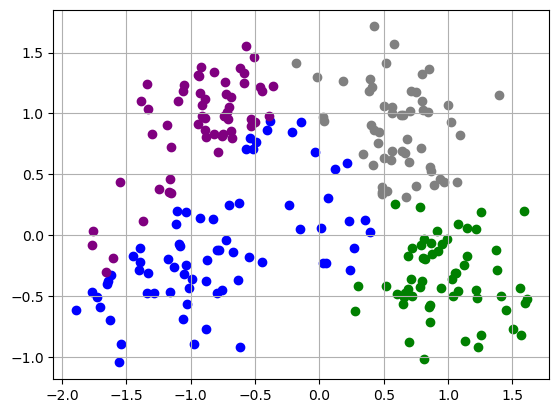

In [10]:
#Print the graph of the scattered points
#get the subplot to print upon
fig1, ax1 = plt.subplots()

#assign each point a colour based on which group they are a part of
colors = ['blue', 'green', 'purple', 'grey']
for i in range(len(groups)):
    for j in range(len(groups[i])):
        ax1.scatter(groups[i][j][0], groups[i][j][1], c=colors[i])
#add a grid and display the image
ax1.grid()
plt.show()

<b>(i)</b> After each re-computation of the centres, mark the centre of each group on the plot of the data points.

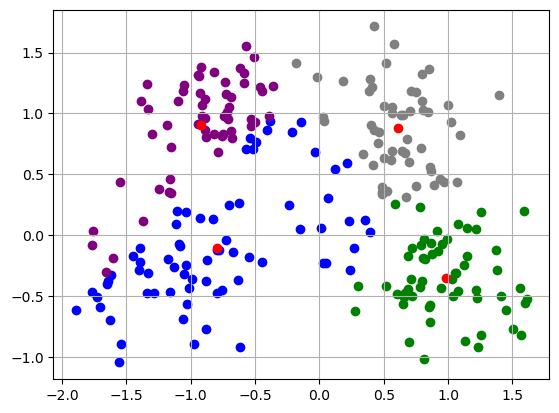

In [11]:
#Print the graph of the scattered points with the centre points
#get the subsplot to print upon
fig2, ax2 = plt.subplots()

#assign each point a colour based on which group they are a part of
colors = ['blue', 'green', 'purple', 'grey']
for i in range(len(groups)):
    for j in range(len(groups[i])):
        ax2.scatter(groups[i][j][0], groups[i][j][1], c=colors[i])

        #paint each centre point as a red dot
for i in range(len(centres)):
    ax2.scatter(centres[i][0], centres[i][1], c = 'red')

#add a grid and display the image
ax2.grid() 
plt.show()

<b>(j)</b> Animate the drawing, plotting the new centroid and the new groupings as they are calculated. (the animation can be as simple like plotLine.py as shown in the Root-Finding Lab (the basis for marking) or it could be a full-fledged animation using Matplotlib (for bonus points)

In [12]:
#get the images necessary for an animation
def get_images(groups, centres, images, fig, ax):
    '''
    This function uses matplotlib to draw an animation of the program organizing itself
    --Inputs--
    groups: 4 by m by 2 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's x and y values
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    images: our collection of images for the animation
    fig: the matplotlib subplot figure the image will be drawn on
    ax: the matplotlib axes the image will be drawn on
    
    --Outputs--
    images: our collection of images for the animation, now with a new image added
    '''
    #in order for this to work, we need to add the points for each "picture" at once
    #we make two lists, one for the points and one for the colors
    colors_list = ['blue', 'green', 'purple', 'grey']
    points_values = []
    point_colors = []
    #this loop creates the two lists
    for i in range(len(groups)):
        #first, this adds the scattered points to the points list
        # it also assigns a colour to the colour list based on the group in the point is in
        for j in range(len(groups[i])):
            points_values.append([groups[i][j][0], groups[i][j][1]])
            point_colors.append(colors_list[i])
        #after each group is complete, the groups center point is added, so it sits atop the group's points
        points_values.append([centres[i][0], centres[i][1]])
        point_colors.append('red')
    
    #the points list gets turned into a numpy array so we can use some of it's features to paint everything at once
    #the colours won't make a tidy numpy array so they stay in the seperate list
    points_array = np.asarray(points_values)

    #the image is printed all at once so the animation will work
    image = ax.scatter(points_array[:,:1], points_array[:,1:2], c= point_colors[::])
    images.append([image])
    
    return images

In [13]:
#call the clusters group and get the groups and RSSs
RSSs, groups = clusters(centres, points, 10 **-8)

<b>(k)</b> Compute the “goodness” of the grouping by computing the sum of the squared distances of each data point in a group from its (group) centroid (RSSk). Report RSS =  sum(RSSk). Plot RSSk as a function of the iteration number.

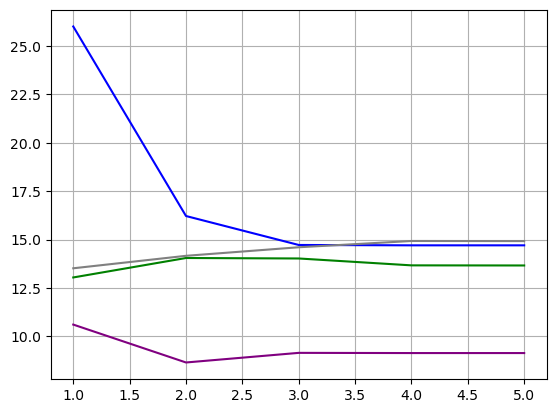

The final RSS of this data is 52.4253


In [14]:
def plot_RSS(RSSs):
    '''
    plots the Residual Sum of Squares (RSS) for each group over the program's run
    also prints the total sum of the group RSSs 
    --Input--
    RSSs: 4 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done
    --Output--
    none
    '''
    #change the RSS to a numpy array so we can use more of it's functionality in the plotting
    RSS = np.asarray(RSSs)
    #the x values in this graph will be from 1 to the amount of moves
    x = np.linspace(1,len(RSSs), num=len(RSSs))
    fig3, ax3 = plt.subplots()
    labels = ['centroid 1', 'centroid 2', 'centroid 3', 'centroid 4']
    colors = ['blue', 'green', 'purple', 'grey']
    #plotting all the points in one go
    for i in range(len(RSS[0])):
        ax3.plot(x, RSS[:,i:(i+1)], c = colors[i], label = labels[i])
    
    #add the grid and show the graph
    ax3.grid()        
    plt.show()
    
    #add all the RSSs together and print the final sum
    RSS_sum = 0
    
    RSS_sum += sum(RSS[len(RSS) - 1])
    
    print('The final RSS of this data is {0:.6}'.format(RSS_sum))
        
#calling the plot RSS function   
plot_RSS(RSSs)


<b>(l)</b> Now that you have each group finalized, compute the mean and standard deviation of the corresponding x and y data for each group, and plot histograms (separately for the x and the y data for each group) of the final groupings.

<IPython.core.display.Javascript object>


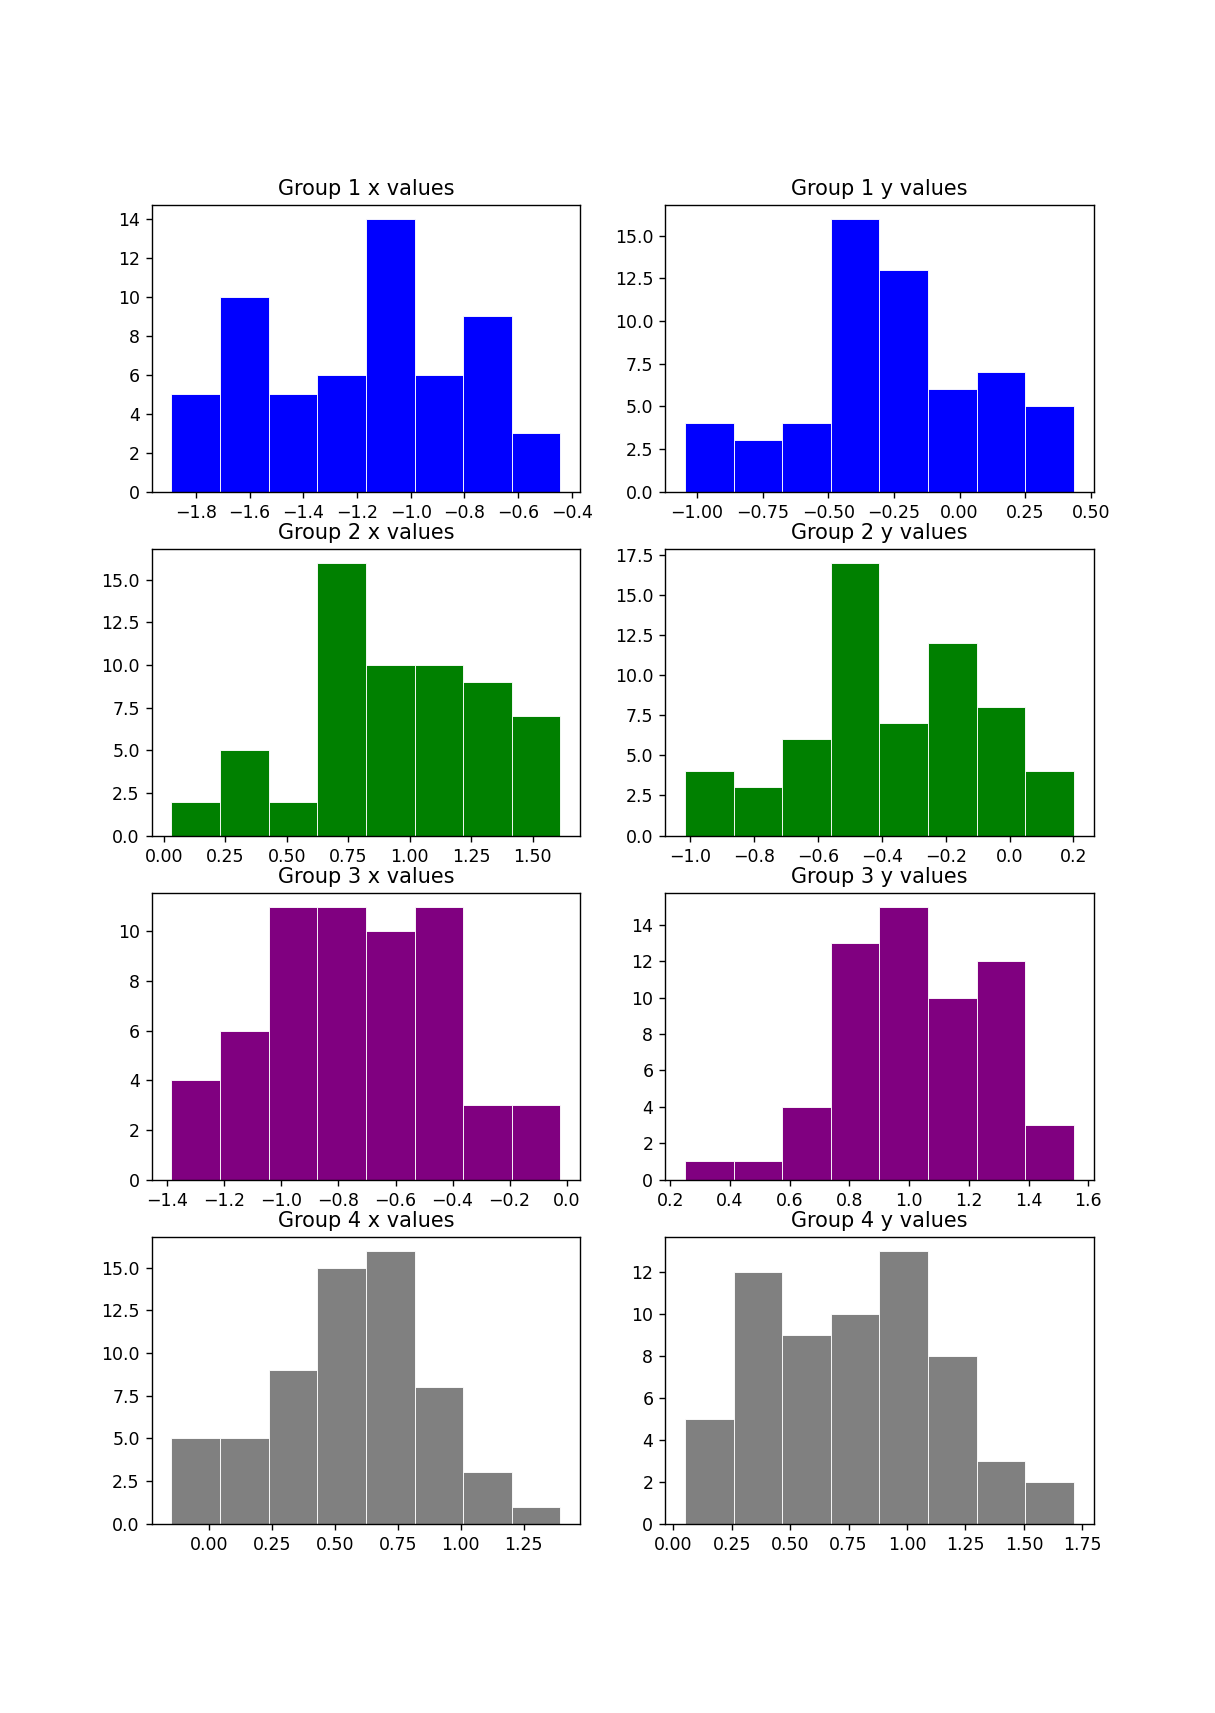

The x mean and std. dev of group 1 is -1.17 and 0.37, the y mean and std. dev of group 1 is -0.252 and 0.341
The x mean and std. dev of group 2 is 0.933 and 0.379, the y mean and std. dev of group 2 is -0.357 and 0.284
The x mean and std. dev of group 3 is -0.729 and 0.306, the y mean and std. dev of group 3 is 1.02 and 0.247
The x mean and std. dev of group 4 is 0.572 and 0.303, the y mean and std. dev of group 4 is 0.771 and 0.386


In [15]:
#the output is cramped, this allows you to drag the screen larger so you can see everythig
%matplotlib notebook
def get_hist(groups):
    '''
    This function draws the histograms of the x and y data of each group and prints their mean and standar deviation
    --Input--
    groups: 4 by m by 2 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's x and y values
    --Output--
    none
    '''
    #get the subplots for the groups
    fig4, axs = plt.subplots(4,2)
    
    group1_array = np.array(groups[0])
    group2_array = np.array(groups[1])
    group3_array = np.array(groups[2])
    group4_array = np.array(groups[3])
    
    print("The x mean and std. dev of group 1 is {0:.3} and {1:.3}, the y mean and std. dev of group 1 is {2:.3} and {3:.3}"
          .format(np.mean(group1_array[:,:1]), np.std(group1_array[:,:1]),np.mean(group1_array[:,1:2]), np.std(group1_array[:,1:2])))
    print("The x mean and std. dev of group 2 is {0:.3} and {1:.3}, the y mean and std. dev of group 2 is {2:.3} and {3:.3}"
          .format(np.mean(group2_array[:,:1]), np.std(group2_array[:,:1]),np.mean(group2_array[:,1:2]), np.std(group2_array[:,1:2])))
    print("The x mean and std. dev of group 3 is {0:.3} and {1:.3}, the y mean and std. dev of group 3 is {2:.3} and {3:.3}"
          .format(np.mean(group3_array[:,:1]), np.std(group3_array[:,:1]),np.mean(group3_array[:,1:2]), np.std(group3_array[:,1:2])))
    print("The x mean and std. dev of group 4 is {0:.3} and {1:.3}, the y mean and std. dev of group 4 is {2:.3} and {3:.3}"
          .format(np.mean(group4_array[:,:1]), np.std(group4_array[:,:1]),np.mean(group4_array[:,1:2]), np.std(group4_array[:,1:2])))
    
    axs[0][0].hist(group1_array[:,:1], bins=8, linewidth=0.5, edgecolor="white", color="blue" )
    axs[0][0].set_title("Group 1 x values")
    
    axs[0][1].hist(group1_array[:,1:2], bins=8, linewidth=0.5, edgecolor="white", color="blue")
    axs[0][1].set_title("Group 1 y values")
    
    axs[1][0].hist(group2_array[:,:1], bins=8, linewidth=0.5, edgecolor="white", color="green")
    axs[1][0].set_title("Group 2 x values")
    
    axs[1][1].hist(group2_array[:,1:2], bins=8, linewidth=0.5, edgecolor="white", color="green")
    axs[1][1].set_title("Group 2 y values")
    
    axs[2][0].hist(group3_array[:,:1], bins=8, linewidth=0.5, edgecolor="white", color='purple')
    axs[2][0].set_title("Group 3 x values")
    
    axs[2][1].hist(group3_array[:,1:2], bins=8, linewidth=0.5, edgecolor="white", color='purple')
    axs[2][1].set_title("Group 3 y values")
    
    axs[3][0].hist(group4_array[:,:1], bins=8, linewidth=0.5, edgecolor="white", color='grey')
    axs[3][0].set_title("Group 4 x values")
    
    axs[3][1].hist(group4_array[:,1:2], bins=8, linewidth=0.5, edgecolor="white", color='grey')
    axs[3][1].set_title("Group 4 y values")
    plt.show()

#call the histogram plotter
get_hist(groups)